#### NOTE: 
do not run this jupyter notebook. we saved the model as glove_lstm.h5
due to memory and time constraints, this model used a downsampled dataset which is not present in the github repo.

In [1]:
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.linear_model import LogisticRegression

RANDOM_STATE=4222

c:\Users\eliga\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text
from keras.utils import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [3]:
EMBEDDING_FILE = 'glove.42B.300d.txt'

In [4]:
combined_df = pd.read_csv('downsampled.csv', encoding='utf-8-sig')


In [6]:
combined_df

,Unnamed: 0,company_profile,description,requirements,benefits,fraudulent,salary_range,telecommuting,has_company_logo,has_questions,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
0,98,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,1,1,0,1,1,...,1,0,1,0,0,0,0,0,1,0
1,144,NaN,The group has raised a fund for the purchase o...,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",1,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
3,180,NaN,Sales Executive,Sales Executive,Sales Executive,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,215,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,1,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,5503,We have created the world’s leading lean custo...,The teamThe Senior Frontend Consultant is part...,Your profileWe are looking for motivate candid...,NaN,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1728,13509,Bluebridge was created by a team of people who...,Description:Bluebridge is a software as a serv...,Your typical day may include:Managing email co...,NaN,0,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
1729,13984,The Technical Team and offering at VML London ...,"The increasingly complex web applications, mob...",Required Knowledge and skills:Client side focu...,NaN,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
1730,4528,ABOUT VERTO Verto Partners is a premier corpor...,Verto Partners has been retained by one of our...,NaN,NaN,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0


train test split first

In [7]:
text = combined_df.loc[:,['company_profile', 'description','requirements','benefits']]
text

,company_profile,description,requirements,benefits
0,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...
1,NaN,The group has raised a fund for the purchase o...,NaN,NaN
2,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he..."
3,NaN,Sales Executive,Sales Executive,Sales Executive
4,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...
...,...,...,...,...
1727,We have created the world’s leading lean custo...,The teamThe Senior Frontend Consultant is part...,Your profileWe are looking for motivate candid...,NaN
1728,Bluebridge was created by a team of people who...,Description:Bluebridge is a software as a serv...,Your typical day may include:Managing email co...,NaN
1729,The Technical Team and offering at VML London ...,"The increasingly complex web applications, mob...",Required Knowledge and skills:Client side focu...,NaN
1730,ABOUT VERTO Verto Partners is a premier corpor...,Verto Partners has been retained by one of our...,NaN,NaN


In [8]:
nontext= combined_df.drop(['company_profile', 'description','requirements','benefits','fraudulent', 'Unnamed: 0'],axis=1)
nontext

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,employment_type_Full-time,employment_type_Not specified,employment_type_Other,employment_type_Part-time,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
0,1,0,1,1,4,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,4,2,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,1,1,4,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1728,1,0,1,1,0,3,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1729,1,0,1,0,4,3,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1730,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
combined_independents = pd.concat([text,nontext], axis=1)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(combined_independents,combined_df['fraudulent'],random_state = RANDOM_STATE)


embeddings for company profiles 

In [14]:
df_profiles = x_train['company_profile']

In [15]:
df_profiles_test = x_test['company_profile']
x_test0 = df_profiles_test 

In [16]:
x_train0 = df_profiles 

In [17]:
len(x_train0)

1299

In [18]:
x_train0 = x_train0.astype(str)


In [19]:
x_test0 = x_test0.astype(str)

In [20]:
max_features = 10000
maxlen = 300
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train0)
tokenized_train = tokenizer.texts_to_sequences(x_train0)
X_train0 = pad_sequences(tokenized_train, maxlen=maxlen)

In [21]:
tokenized_test = tokenizer.texts_to_sequences(x_test0)
X_test0 = pad_sequences(tokenized_test, maxlen=maxlen)

In [22]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [23]:
len(tokenizer.word_index)

7081

In [24]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index)+1)
#change below line if computing normal stats is too slow
embedding_matrix_profiles = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_profiles[i] = embedding_vector

c:\Users\eliga\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


embeddings for descriptions

In [25]:
df_descriptions = x_train['description']

In [26]:
x_train1 = df_descriptions 
x_train1 = x_train1.astype(str)

In [27]:
df_descriptions_test = x_test['description']
x_test1 = df_descriptions_test 
x_test1 = x_test1.astype(str)

In [28]:
max_features = 10000
maxlen = 300
tokenizer1 = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer1.fit_on_texts(x_train1)
tokenized_train1 = tokenizer1.texts_to_sequences(x_train1)
X_train1 = pad_sequences(tokenized_train1, maxlen=maxlen)

In [29]:
tokenized_test1 = tokenizer1.texts_to_sequences(x_test1)
X_test1 = pad_sequences(tokenized_test1, maxlen=maxlen)

In [30]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer1.word_index
nb_words = min(max_features, len(word_index)+1)
#change below line if computing normal stats is too slow
embedding_matrix_descriptions = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_descriptions[i] = embedding_vector

Embeddings for requirements



In [31]:
df_requirements= x_train['requirements']
x_train2 = df_requirements 
x_train2 = x_train2.astype(str)

In [32]:
df_requirements_test = x_test['requirements']
x_test2 = df_requirements_test 
x_test2 = x_test2.astype(str)

In [33]:
max_features = 10000
maxlen = 300
tokenizer2 = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer2.fit_on_texts(x_train2)
tokenized_train2 = tokenizer2.texts_to_sequences(x_train2)
X_train2 = pad_sequences(tokenized_train2, maxlen=maxlen)

In [34]:
tokenized_test2 = tokenizer2.texts_to_sequences(x_test2)
X_test2 = pad_sequences(tokenized_test2, maxlen=maxlen)

In [35]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer2.word_index
nb_words = min(max_features, len(word_index)+1)
#change below line if computing normal stats is too slow
embedding_matrix_requirements = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_requirements[i] = embedding_vector

Embeddings for benefits



In [36]:
df_benefits= x_train['benefits']
x_train3 = df_benefits 
x_train3 = x_train2.astype(str)

In [37]:
df_benefits_test = x_test['benefits']
x_test3 = df_benefits_test 
x_test3 = x_test3.astype(str)

In [38]:
max_features = 10000
maxlen = 300
tokenizer3 = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer3.fit_on_texts(x_train3)
tokenized_train3 = tokenizer3.texts_to_sequences(x_train3)
X_train3 = pad_sequences(tokenized_train3, maxlen=maxlen)

In [39]:
tokenized_test3 = tokenizer3.texts_to_sequences(x_test3)
X_test3 = pad_sequences(tokenized_test3, maxlen=maxlen)

In [40]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer3.word_index
nb_words = min(max_features, len(word_index)+1)
#change below line if computing normal stats is too slow
embedding_matrix_benefits = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_benefits[i] = embedding_vector

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM, Embedding
from keras.layers import concatenate,Reshape

In [42]:
embedding_matrix_profiles.shape
print(embedding_matrix_descriptions.shape)
print(embedding_matrix_requirements.shape)

(10000, 300)
(10000, 300)


In [43]:
cat_train = x_train.drop(columns=['company_profile', 'description','requirements','benefits'])

In [44]:
cat_train.columns

Index(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions',
       'required_experience', 'required_education',
       'employment_type_Full-time', 'employment_type_Not specified',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'industry_common', 'industry_rare',
       'industry_uncommon', 'industry_very rare', 'function_common',
       'function_uncommon', 'country_common', 'country_rare',
       'country_uncommon', 'country_very rare', 'state_common', 'state_rare',
       'state_uncommon', 'state_very rare'],
      dtype='object')

In [45]:
cat_test = x_test.drop(columns=['company_profile', 'description','requirements','benefits'])

In [46]:
cat_test

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,employment_type_Full-time,employment_type_Not specified,employment_type_Other,employment_type_Part-time,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
558,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1050,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
509,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
588,1,1,0,0,2,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
605,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
638,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
783,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
186,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [47]:
cat_train

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,employment_type_Full-time,employment_type_Not specified,employment_type_Other,employment_type_Part-time,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
1002,0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1139,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
530,0,0,0,0,4,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
170,0,0,0,0,2,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
418,1,0,1,1,2,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1,0,1,1,0,3,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
683,1,0,0,0,2,3,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1410,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1380,0,0,1,1,3,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [48]:

#model 1 profiles 
inputs_11 = Input(shape=(300,))
embed11 = Embedding(len(embedding_matrix_profiles), output_dim=embed_size, weights=[embedding_matrix_profiles], input_length=len(embedding_matrix_profiles), trainable=False)(inputs_11)
reshape11 = Reshape((embedding_matrix_profiles.shape[1], embed_size, 1))(embed11)
lstm_11 = LSTM(units=128 , return_sequences=True , recurrent_dropout=0.25 , dropout=0.25)(embed11)
lstm_12 = LSTM(units=64 , recurrent_dropout=0.1 , dropout=0.1)(lstm_11)
dense_11 = Dense(units=32 , activation='relu')(lstm_12)
outputs_11 = Dense(1, activation='sigmoid')(dense_11)
model_1 = Model(inputs=inputs_11, outputs=outputs_11)

#model 2 descriptions 
inputs_21 = Input(shape=(300,))
embed21 = Embedding(len(embedding_matrix_descriptions), output_dim=embed_size, weights=[embedding_matrix_descriptions], input_length=len(embedding_matrix_descriptions), trainable=False)(inputs_21)
reshape21 = Reshape((embedding_matrix_descriptions.shape[1], embed_size, 1))(embed21)
lstm_21 = LSTM(units=128 , return_sequences=True , recurrent_dropout=0.25 , dropout=0.25)(embed21)
lstm_22 = LSTM(units=64 , recurrent_dropout=0.1 , dropout=0.1)(lstm_21)
dense_21 = Dense(units=32 , activation='relu')(lstm_22)
outputs_21  = Dense(1, activation='sigmoid')(dense_21)
model_2 = Model(inputs=inputs_21, outputs=outputs_21)

#model 3 requirements 
inputs_31 = Input(shape=(300,))
embed31 = Embedding(len(embedding_matrix_requirements), output_dim=embed_size, weights=[embedding_matrix_requirements], input_length=len(embedding_matrix_requirements), trainable=False)(inputs_31)
reshape31 = Reshape((embedding_matrix_requirements.shape[1], embed_size, 1))(embed31)
lstm_31 = LSTM(units=128 , return_sequences=True , recurrent_dropout=0.25 , dropout=0.25)(embed31)
lstm_32 = LSTM(units=64 , recurrent_dropout=0.1 , dropout=0.1)(lstm_31)
dense_31 = Dense(units=32 , activation='relu')(lstm_32)
outputs_31 = Dense(1, activation='sigmoid')(dense_31)
model_3 = Model(inputs=inputs_31, outputs=outputs_31)

#model 4 benefits
inputs_41 = Input(shape=(300,))
embed41 = Embedding(len(embedding_matrix_benefits), output_dim=embed_size, weights=[embedding_matrix_benefits], input_length=len(embedding_matrix_benefits), trainable=False)(inputs_41)
reshape41 = Reshape((embedding_matrix_benefits.shape[1], embed_size, 1))(embed41)
lstm_41 = LSTM(units=128 , return_sequences=True , recurrent_dropout=0.25 , dropout=0.25)(embed41)
lstm_42 = LSTM(units=64 , recurrent_dropout=0.1 , dropout=0.1)(lstm_41)
dense_41 = Dense(units=32 , activation='relu')(lstm_42)
outputs_41 = Dense(1, activation='sigmoid')(dense_41)
model_4 = Model(inputs=inputs_41, outputs=outputs_41)

#cat variables 
inputs_51 = Input(shape=(cat_train.shape[1],))
dense_51 = Dense(64,activation='relu',input_dim=cat_train.shape[1])(inputs_51)
dropout_51 = Dropout(0.5)(dense_51)
dense_52 = Dense(32,activation='relu')(dropout_51)
outputs_51 = Dense(1,activation='sigmoid')(dense_52)
model_5 = Model(inputs=inputs_51, outputs=outputs_51)

concatenated = concatenate([model_1.output, model_2.output, model_3.output, model_4.output, model_5.output])
# concatenated = concatenate([model_1.output, model_2.output, model_3.output, model_4.output])


dense_4 = Dense(32, activation='relu')(concatenated)
outputs = Dense(1, activation='sigmoid')(dense_4)

final_model = Model(inputs=[model_1.input, model_2.input, model_3.input, model_4.input, model_5.input], outputs=outputs)

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
final_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 300)]        0           []                               
                                                                                            

In [50]:
y_train = np.asarray(y_train).astype('float32')

In [51]:
y_test_= np.asarray(y_test).astype('float32')

In [54]:
history = final_model.fit([X_train0,X_train1,X_train2,X_train3, cat_train], y_train, batch_size = 256, validation_data = ([X_test0,X_test1,X_test2,X_test3, cat_test],y_test) , epochs = 10)

Epoch 1/10
6/6 [==============================] - 695s 101s/step - loss: 0.6884 - accuracy: 0.5119 - val_loss: 0.6789 - val_accuracy: 0.4642
Epoch 2/10
6/6 [==============================] - 1934s 321s/step - loss: 0.6674 - accuracy: 0.6112 - val_loss: 0.6611 - val_accuracy: 0.7760
Epoch 3/10


In [ ]:
final_model.save('glove_lstm.h5')

In [ ]:
import matplotlib.pyplot as plt
def plot_history(his):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    
    def plot_graphs(ax, history, string):
        ax.plot(history.history[string])
        ax.plot(history.history['val_'+string])
        ax.set_xlabel("Epochs")
        ax.set_ylabel(string)
        ax.legend([string, 'val_'+string])

    plot_graphs(ax[0], his, "accuracy")
    plot_graphs(ax[1], his, "loss")

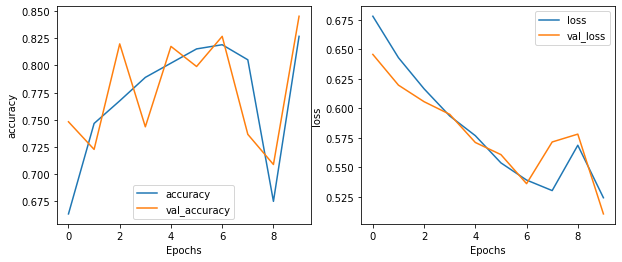

In [ ]:
plot_history(history)

In [ ]:
colist = ['company_profile','description','requirements','benefits']
for col in colist:
    tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
    column = x_train[col]
    tokenized = []
    for entry in column:
        tokenized_text = tokenizer.texts_to_sequences(str(entry))
        text = pad_sequences(tokenized_text,maxlen=maxlen)
        tokenized.append(text)
    print(len(tokenized))
    x_train[col + 'tokenized'] = tokenized

1299
1299
1299
1299


In [ ]:
X_train = x_train.loc[:,['company_profiletokenized','descriptiontokenized','requirementstokenized','benefitstokenized']]

In [ ]:
final_model = keras.models.load_model('glove_lstm.h5')

In [ ]:
output = final_model.predict([X_test0,X_test1,X_test2,X_test3, cat_test])

14/14 [==============================] - 12s 701ms/step


In [ ]:
final_output = []
for x in output:
    if x<=0.5:
        final_output.append([0])
    else:
        final_output.append([1])

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, final_output)

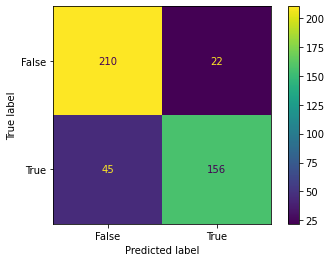

In [ ]:
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

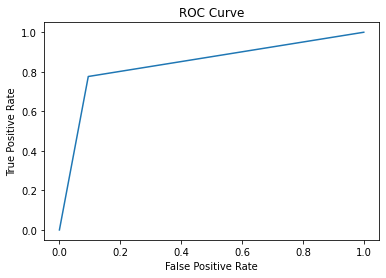

Accuracy: 0.845
Precision: 0.876
Recall: 0.776
AUC-ROC: 0.841
f1: 0.823


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,f1_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, final_output)
precision = precision_score(y_test, final_output)
recall = recall_score(y_test, final_output)
auc_roc = roc_auc_score(y_test, final_output)
f1 = f1_score(y_test, final_output)
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, final_output)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# print the results
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('AUC-ROC: {:.3f}'.format(auc_roc))
print('f1: {:.3f}'.format(f1))

In [ ]:
colist = ['company_profile','description','requirements','benefits']
for col in colist:
    tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
    column = x_test[col]
    tokenized = []
    for entry in column:
        tokenized_text = tokenizer.texts_to_sequences(str(entry))
        text = pad_sequences(tokenized_text,maxlen=maxlen)
        tokenized.append(text)
    print(len(tokenized))
    x_test[col + 'tokenized'] = tokenized

4470


MemoryError: Unable to allocate 4.97 MiB for an array with shape (4339, 300) and data type int32

In [ ]:
y_test

11791    0
6977     0
11481    0
1745     0
15071    0
        ..
16407    0
86       0
3438     1
12759    0
3833     0
Name: fraudulent, Length: 4470, dtype: int64

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
final_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 300)]        0           []                               
                                                                                            

In [ ]:
history = final_model.fit(X_train, y_train, batch_size = 256 , epochs = 10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

NameError: name 'model3' is not defined

In [ ]:
model3.save('/content/gdrive/MyDrive/BT4222_mine/models/model_benefits.h5')

Feed into dense layer

*get the train test split from big dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.linear_model import LogisticRegression

RANDOM_STATE=4222

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text
from keras.utils import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
text_df = pd.read_csv('/content/gdrive/MyDrive/BT4222_mine/fake_job_postings.csv')

In [ ]:
text_df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
cat_df = pd.read_csv('/content/gdrive/MyDrive/BT4222_mine/Categorical_post_processing.csv')

In [ ]:
cat_df.columns

Index(['Unnamed: 0', 'salary_range', 'telecommuting', 'has_company_logo',
       'has_questions', 'required_experience', 'required_education',
       'fraudulent', 'employment_type_Full-time',
       'employment_type_Not specified', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'industry_common', 'industry_rare', 'industry_uncommon',
       'industry_very rare', 'function_common', 'function_uncommon',
       'country_common', 'country_rare', 'country_uncommon',
       'country_very rare', 'state_common', 'state_rare', 'state_uncommon',
       'state_very rare'],
      dtype='object')

In [ ]:
cat_df = cat_df.drop(columns='Unnamed: 0')

In [ ]:
cat_df

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,fraudulent,employment_type_Full-time,employment_type_Not specified,employment_type_Other,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
0,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,4,3,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0,0,1,1,4,3,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,1,4,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
17876,0,0,1,1,4,3,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
17877,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
17878,0,0,0,1,0,2,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
combined_df = pd.concat([text_df, cat_df], axis=1)

In [ ]:
combined_df_copy = combined_df.copy()


In [ ]:
dependent = combined_df['fraudulent']

In [ ]:
independents = combined_df.drop(columns='fraudulent')

In [ ]:
independents_text = independents[['company_profile', 'description', 'requirements', 'benefits']]

In [ ]:
independents_text = independents_text.assign(keywords_all=independents_text.apply(lambda x : x.to_string(index =False,na_rep=False),axis=1).replace({"\n":','},regex=True)
)

In [ ]:
keywords_all = independents_text['keywords_all']

In [ ]:
independents = pd.concat([keywords_all, independents], axis=1)

In [ ]:
independents

,keywords_all,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,function_common,function_uncommon,country_common,country_rare,country_uncommon,country_very rare,state_common,state_rare,state_uncommon,state_very rare
0,"We're Food52, and we've created a groundbreaki...",1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,...,1,0,1,0,0,0,1,0,0,0
1,"90 Seconds, the worlds Cloud Video Production ...",2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,1,0,1,0,0,0,1,0,0,0
2,Valor Services provides Workforce Solutions th...,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,...,0,0,1,0,0,0,0,1,0,0
3,Our passion for improving quality of life thro...,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,1,0,1,0,0,0,1,0,0,0
4,SpotSource Solutions LLC is a Global Human Cap...,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,...,1,0,1,0,0,0,0,0,1,0
17876,WebLinc is the e-commerce platform and service...,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,1,0,1,0,0,0,0,0,1,0
17877,We Provide Full Time Permanent Positions for m...,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,...,0,0,1,0,0,0,1,0,0,0
17878,F...,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,...,1,0,0,1,0,0,0,1,0,0


In [ ]:

x_train,x_test,y_train,y_test = train_test_split(independents, dependent,random_state = RANDOM_STATE)
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [ ]:
max_features = 10000
maxlen = 300
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train['keywords_all'])
tokenized_train = tokenizer.texts_to_sequences(x_train['keywords_all'])
X_train_text = pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
X_train

array([[   0,    0,    0, ...,  504,    2,    2],
       [   0,    0,    0, ...,   14,  572,  919],
       [   0,    0,    0, ...,    1,  257, 2617],
       ...,
       [   0,    0,    0, ...,  966,  482,    2],
       [   0,    0,    0, ..., 4818,  115,    1],
       [   0,    0,    0, ...,   14,   79,    2]], dtype=int32)

In [ ]:
EMBEDDING_FILE = '/content/gdrive/MyDrive/BT4222_mine/glove.42B.300d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
cat_train = x_train.drop(['title','company_profile','description','requirements','benefits'],axis=1)
cat_test = x_test.drop(['title','company_profile','description','requirements','benefits'],axis=1)

In [ ]:
cat_train.shape[1]

38

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM, Embedding
from keras.layers import concatenate

# Define the first model
inputs_1 = Input(shape=(maxlen,))
embed = Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False)(inputs_1)
lstm_1 = LSTM(units=128 , return_sequences=True , recurrent_dropout=0.25 , dropout=0.25)(embed)
lstm_2 = LSTM(units=64 , recurrent_dropout=0.1 , dropout=0.1)(lstm_1)
dense_1 = Dense(units=32 , activation='relu')(lstm_2)
outputs_1 = Dense(1, activation='sigmoid')(dense_1)
model_1 = Model(inputs=inputs_1, outputs=outputs_1)

# Define the second model
inputs_2 = Input(shape=(cat_train.shape[1],))
dense_2 = Dense(64,activation='relu',input_dim=cat_train.shape[1])(inputs_2)
dropout_1 = Dropout(0.5)(dense_2)
dense_3 = Dense(32,activation='relu')(dropout_1)
outputs_2 = Dense(1,activation='sigmoid')(dense_3)
model_2 = Model(inputs=inputs_2, outputs=outputs_2)

# Concatenate the models
concatenated = concatenate([model_1.output, model_2.output])

# Define the final layers
dense_4 = Dense(32, activation='relu')(concatenated)
outputs = Dense(1, activation='sigmoid')(dense_4)

# Define the final model
final_model = Model(inputs=[model_1.input, model_2.input], outputs=outputs)

# Compile the final model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 256
epochs = 10
embed_size = 300

In [ ]:
history = final_model.fit([X_train_text, cat_train], y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs)

Epoch 1/10


ValueError: ignored